# Librerias a utilizar

In [2]:
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt

In [3]:
# set matplotlib para una imagen en 16:9.
plt.rcParams['figure.figsize'] = (16,9)

# Punto 1

In [4]:
# Creación de archivo CSV.
client = bigquery.Client()
sql = "SELECT * FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`"

df = client.query(sql).to_dataframe()
df.to_csv('Accidente_2015.csv')

# Punto 2

## Sección 1

Como queremos saber el mayor numero de accidentes por estado (columna 'state_name') analisamos esta con las funciones de DataFrame.

In [5]:
# Con esto podemos aislar la columna de 'state_name'.
df['state_name'].unique()

array(['Montana', 'Ohio', 'Utah', 'Texas', 'Oregon', 'Pennsylvania',
       'New Jersey', 'Washington', 'Kansas', 'Colorado', 'Virginia',
       'Missouri', 'Michigan', 'Alabama', 'Delaware', 'Minnesota',
       'New Mexico', 'Wyoming', 'Iowa', 'Wisconsin', 'Florida',
       'New York', 'Georgia', 'Indiana', 'Illinois', 'Kentucky',
       'California', 'North Carolina', 'South Carolina', 'Nevada',
       'Oklahoma', 'Alaska', 'Arizona', 'Tennessee', 'Arkansas',
       'Mississippi', 'Connecticut', 'Maryland', 'West Virginia',
       'Louisiana', 'North Dakota', 'Massachusetts', 'Maine',
       'South Dakota', 'Nebraska', 'Vermont', 'Rhode Island',
       'New Hampshire', 'District of Columbia', 'Idaho', 'Hawaii'],
      dtype=object)

In [6]:
# Con esto podemos tener una vista mas general de la columna a la cual estamos consultando.
df['state_name'].describe()

count     32538
unique       51
top       Texas
freq       3190
Name: state_name, dtype: object

In [7]:
# Con esto podemos contar el numero de insidentes ocurridos por estado.
df['state_name'].value_counts()

Texas                   3190
California              3123
Florida                 2699
Georgia                 1329
North Carolina          1275
Pennsylvania            1102
New York                1061
Ohio                    1029
Illinois                 914
South Carolina           911
Michigan                 896
Tennessee                888
Arizona                  811
Missouri                 803
Alabama                  784
Indiana                  752
Virginia                 712
Louisiana                698
Kentucky                 694
Mississippi              604
Oklahoma                 590
Wisconsin                523
New Jersey               521
Colorado                 507
Washington               499
Arkansas                 491
Maryland                 479
Oregon                   411
Minnesota                375
Massachusetts            327
Kansas                   322
Nevada                   297
Iowa                     282
New Mexico               269
Utah          

<center>Con esto podemos notar que el numero maximo es en Texas con un numero de 3190 accidentes.<center>

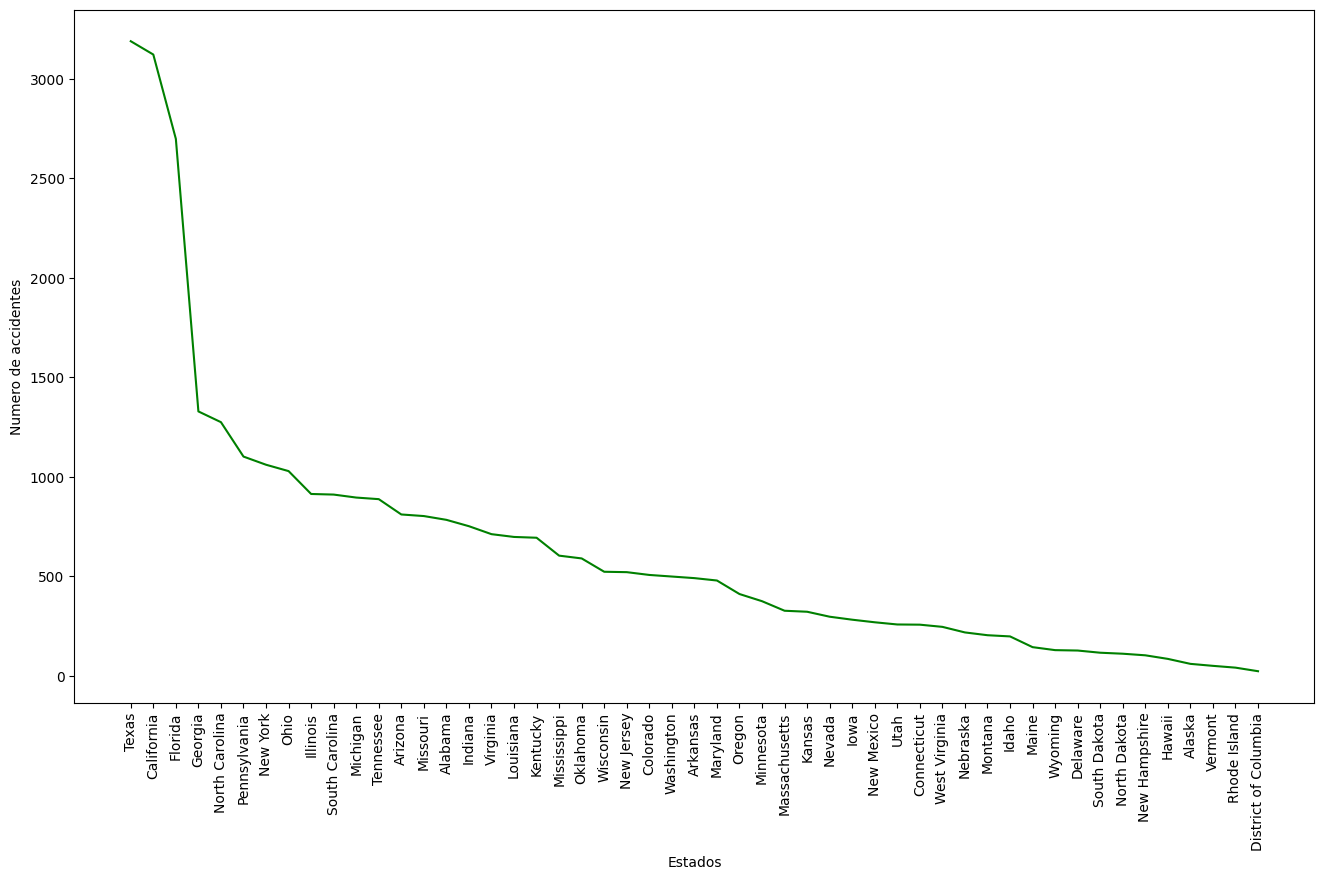

In [8]:
# Una vez obtenidos los datos, podemos graficar el numero de accidentes ocurridos en cada estado de la
# siguiente manera.

x = list( df['state_name'].value_counts().keys() )
y = list( df['state_name'].value_counts() )

plt.plot( x , y , 'g' )
plt.xticks( rotation = 'vertical' )
plt.xlabel( 'Estados' )
plt.ylabel( 'Numero de accidentes' )
plt.show()


## Sección 2

En esta sección se busca encontrar el numero maximo de accidentes por uso de tierra analisando la columana 'land_use' de la base de datos.

In [9]:
# Primero le pedimos a DataFrame que nos describa 'land_use' para ver el tipo de arreglo que 
# vamos a analizar.
df['land_use'].describe()

count     32538.0
mean     1.538017
std      0.628475
min           1.0
25%           1.0
50%           2.0
75%           2.0
max           9.0
Name: land_use, dtype: Float64

In [10]:
# Podemos observar que solo son numeros, ahora veremos 10 ejeplos de este arreglo.
df['land_use'].sample(10)

30480    1
28898    1
20689    2
16551    2
12143    1
20724    2
26617    2
26398    2
2804     1
14926    1
Name: land_use, dtype: Int64

In [11]:
# Veremos la cuenta de valores del arreglo segun sus variables.
df['land_use'].value_counts()

2    16494
1    15860
6      150
9       24
8       10
Name: land_use, dtype: Int64

<center>Notamos que el numero maximo de accidentes es 16494 por 2 usos de tierra.<center>

In [12]:
# Analicemos si esta se relaciona con la variable anterior o si tiene alguna correlación viendo 
# 20 ejemplos de las dos.
df.loc[:,['land_use','state_name']].sample(20)

,land_use,state_name
23087,2,Ohio
24970,2,Alabama
9392,1,North Dakota
8569,2,Wisconsin
29282,1,Ohio
27105,2,South Carolina
26848,2,Arizona
29718,1,Mississippi
931,1,Pennsylvania
13998,2,Massachusetts


<center>Notamos que no existe una relación entre ellas.<center>

Text(0, 0.5, 'Numero de accidentes')

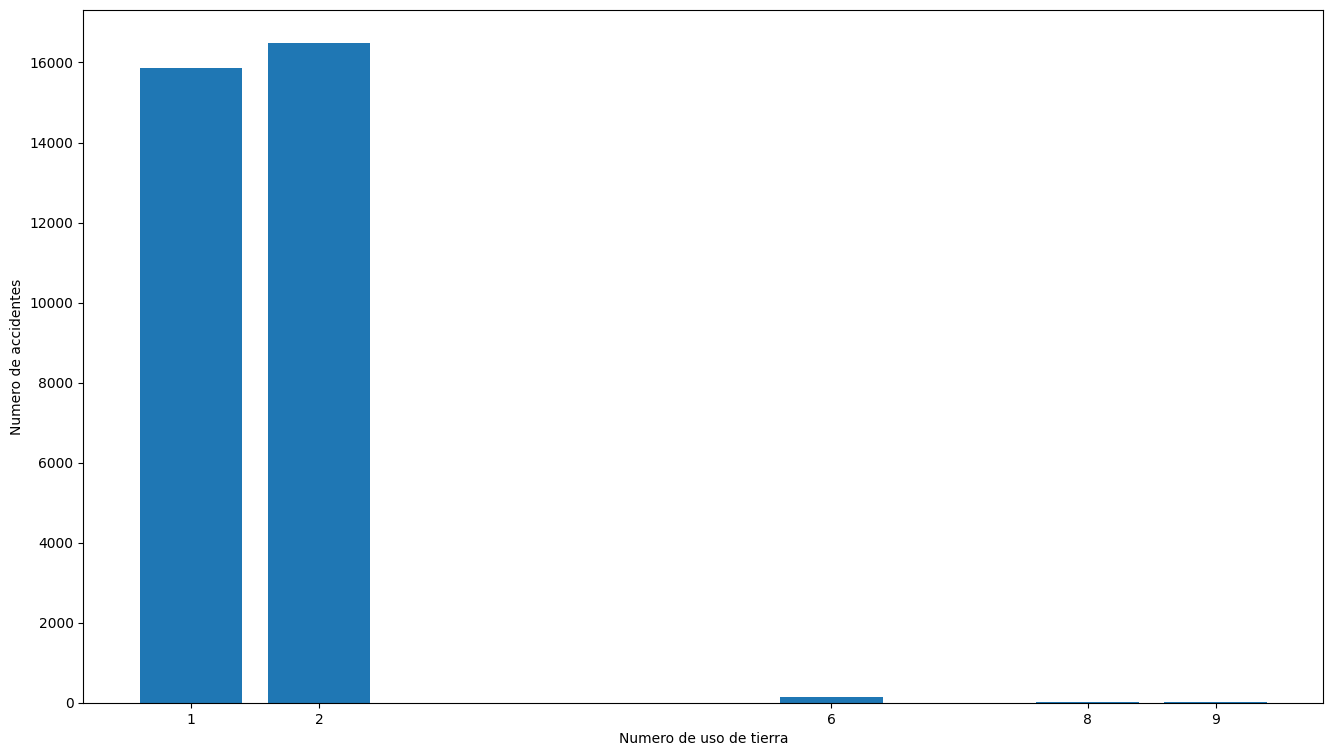

In [19]:
# Viendo lo anterior de manera grafica.

# Definimos las variabes.
x = list( df['land_use'].value_counts().keys() )
y = list( df['land_use'].value_counts() )

# Creacion de grafica.
plt.bar( x , y )
plt.xticks( x )
plt.xlabel( 'Numero de uso de tierra' )
plt.ylabel( 'Numero de accidentes' )

## Sección 3

En esta sección se busca encontrar el numero maximo de accidentes por empresa de carreteras que esta contenido dentro de la columna 'ownership_name'.

In [14]:
# Primero le pedimos a DataFrame que nos describa 'ownership_name' para ver el tipo de arreglo que 
# vamos a analizar.
df['ownership'].describe()

count      32538.0
mean     25.310406
std      40.832943
min            1.0
25%            1.0
50%            2.0
75%           25.0
max           99.0
Name: ownership, dtype: Float64

In [15]:
# Veamos el nombre de las empresas de carreteras que analisaremos.
df['ownership_name'].unique()

array(['State Highway Agency', 'State Toll Road', 'Not Reported',
       'City or Municipal Highway Agency', 'Other Local Agency',
       'Unknown', 'Trafficway Not in State Inventory',
       'County Highway Agency', 'Bureau of Land Management',
       'Town or Township Highway Agency', 'Indian Tribe Nation',
       'State Park, Forest or Reservation Agency',
       'Bureau of Indian Affairs', 'National Park Service',
       'Private [other than Railroad]', 'Other Federal Agency',
       'Other State Agency', 'U.S. Forest Service',
       'Local Park, Forest or Reservation Agency',
       'Bureau of Fish and Wildlife',
       'Other Public Instrumentality [i.e., Airport]', 'Navy/Marines'],
      dtype=object)

In [16]:
#Veremos cuantos accidentes han ocurrido por empresa de carretera.
df['ownership_name'].value_counts()

State Highway Agency                            16107
Not Reported                                     6388
City or Municipal Highway Agency                 3390
County Highway Agency                            3295
Unknown                                          1139
Town or Township Highway Agency                  1046
Other Local Agency                                738
Trafficway Not in State Inventory                 150
State Toll Road                                    80
Other Federal Agency                               56
Bureau of Indian Affairs                           33
Indian Tribe Nation                                20
State Park, Forest or Reservation Agency           19
Private [other than Railroad]                      18
Other State Agency                                 18
U.S. Forest Service                                17
National Park Service                              15
Bureau of Land Management                           4
Other Public Instrumentality

<center>Notemos que el mayor numero de accidentes se centra en la empresa 'State Highway Agency' con 16107 accidentes.<center>

In [17]:
# Ahora veremos el cruce de los 3 valores analizados previamente.
df.loc[:,['land_use','state_name','ownership_name']].value_counts()

land_use  state_name  ownership_name                 
2         Texas       Not Reported                       1450
          California  Not Reported                       1436
          Florida     State Highway Agency               1364
1         Texas       Not Reported                       1172
          California  Not Reported                       1072
                                                         ... 
          Utah        Other Federal Agency                  1
                      Private [other than Railroad]         1
          Virginia    County Highway Agency                 1
                      Private [other than Railroad]         1
2         Alabama     Town or Township Highway Agency       1
Length: 485, dtype: int64

<center>Notemos que el mayor numero de accidentes reportados se da en florida con 2 usos de tierra en la empresa 'State Highway Agency'.<center>

Text(0, 0.5, 'Numero de accidentes')

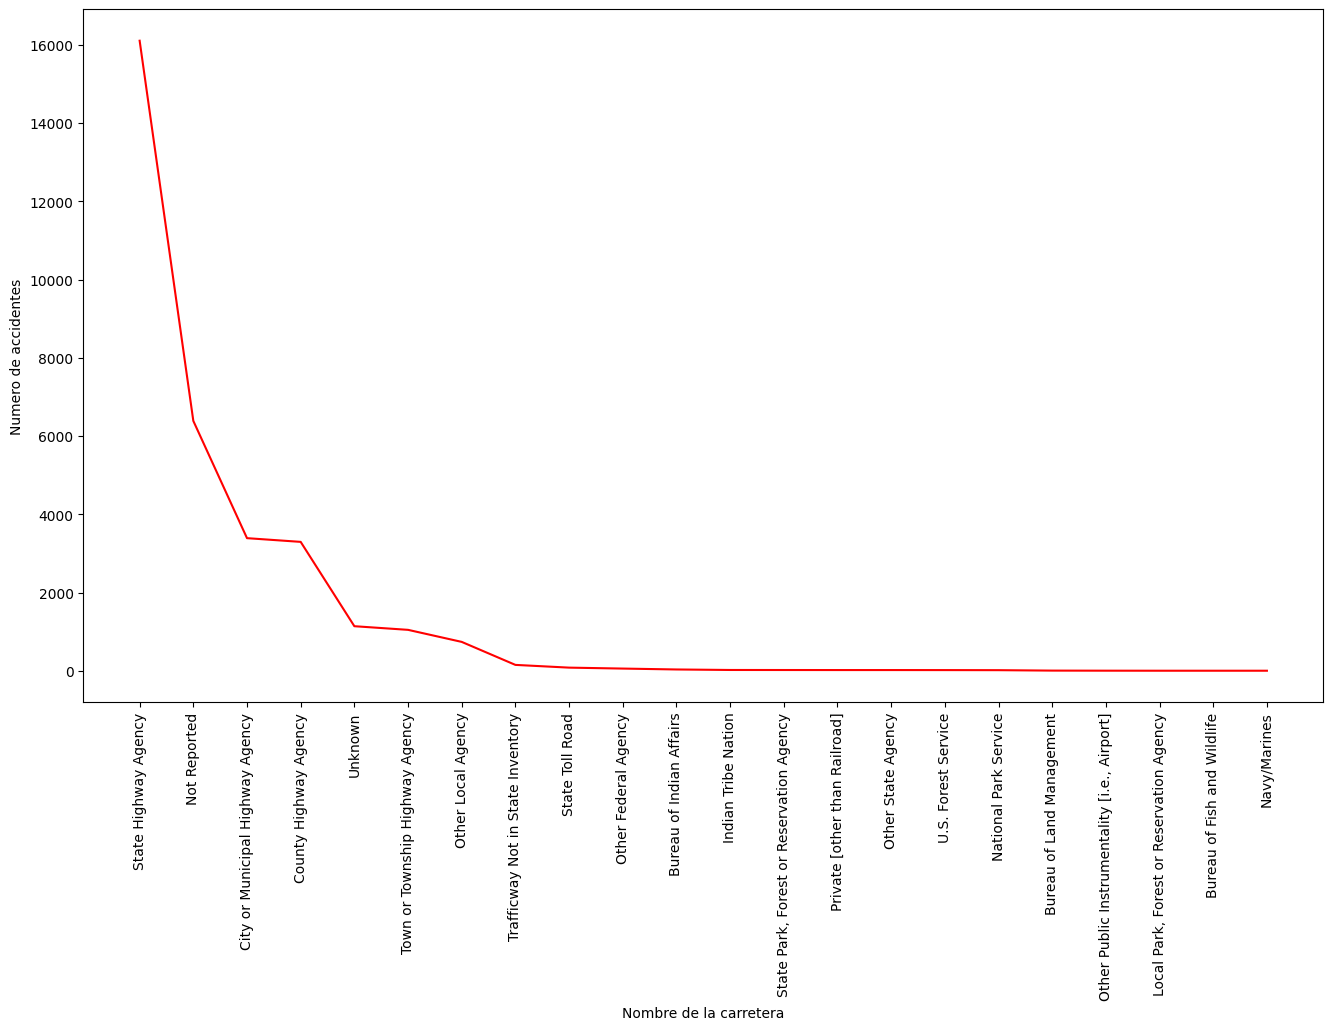

In [20]:
# Graficando el numero el numero de accidentes por carretera.

# Definiendo variables a graficar
x = list( df['ownership_name'].value_counts().keys() ) 
y = list( df['ownership_name'].value_counts() )

# Creando grafico
plt.plot( x , y , 'r' )
plt.xticks( rotation = 'vertical' )
plt.xlabel( 'Nombre de la carretera' )
plt.ylabel( 'Numero de accidentes' )

## Sección 4

En esta sección se busca encontrar el numero maximo de accidentes por carreteras que esta contenido dentro de la columna 'trafficway_identifier'.

In [21]:
# Primero le pedimos a DataFrame que nos describa 'trafficway_identifier' para ver el tipo de arreglo que 
# vamos a analizar.
df['trafficway_identifier'].describe()

count     32538
unique    15678
top        I-10
freq        274
Name: trafficway_identifier, dtype: object

In [22]:
# Veremos una lista de cuantos accidentes han ocurrido por carretera.
df['trafficway_identifier'].value_counts()

I-10                         274
I-95                         213
I-75                         204
US-1                         190
I-40                         159
                            ... 
SR-127 HILLSBORO VIOLA RD      1
SR-461/49 THE TRACE            1
SR-195 RHEA RD                 1
SR-129 NEW OSTELLA RD          1
CR-580 MAIN ST.                1
Name: trafficway_identifier, Length: 15678, dtype: int64

<center>Notemos que el mayor numero de accidentes fue en la carretera "I-10" con un total de 274, como se pudo ver anteriormente con la función '.describe()'.<center>

In [23]:
# Haciendo una comparativa de este junto los otros 3 datos pedidos anteriormente
df.loc[:,['land_use','state_name','ownership_name','trafficway_identifier']].value_counts()

land_use  state_name    ownership_name                   trafficway_identifier
2         Florida       State Highway Agency             US-1                     104
                                                         US-41                     64
                                                         I-95                      63
          California    State Highway Agency             I-5                       57
1         Texas         State Highway Agency             I-10                      56
                                                                                 ... 
          Pennsylvania  Town or Township Highway Agency  WHIPPLE RD                 1
                                                         WEST CANAL ROAD            1
                                                         VALLEY GREEN RD            1
                                                         TURNPIKE RAMP RD           1
9         Texas         Unknown                          US-9

Text(0, 0.5, 'Numero de accidentes')

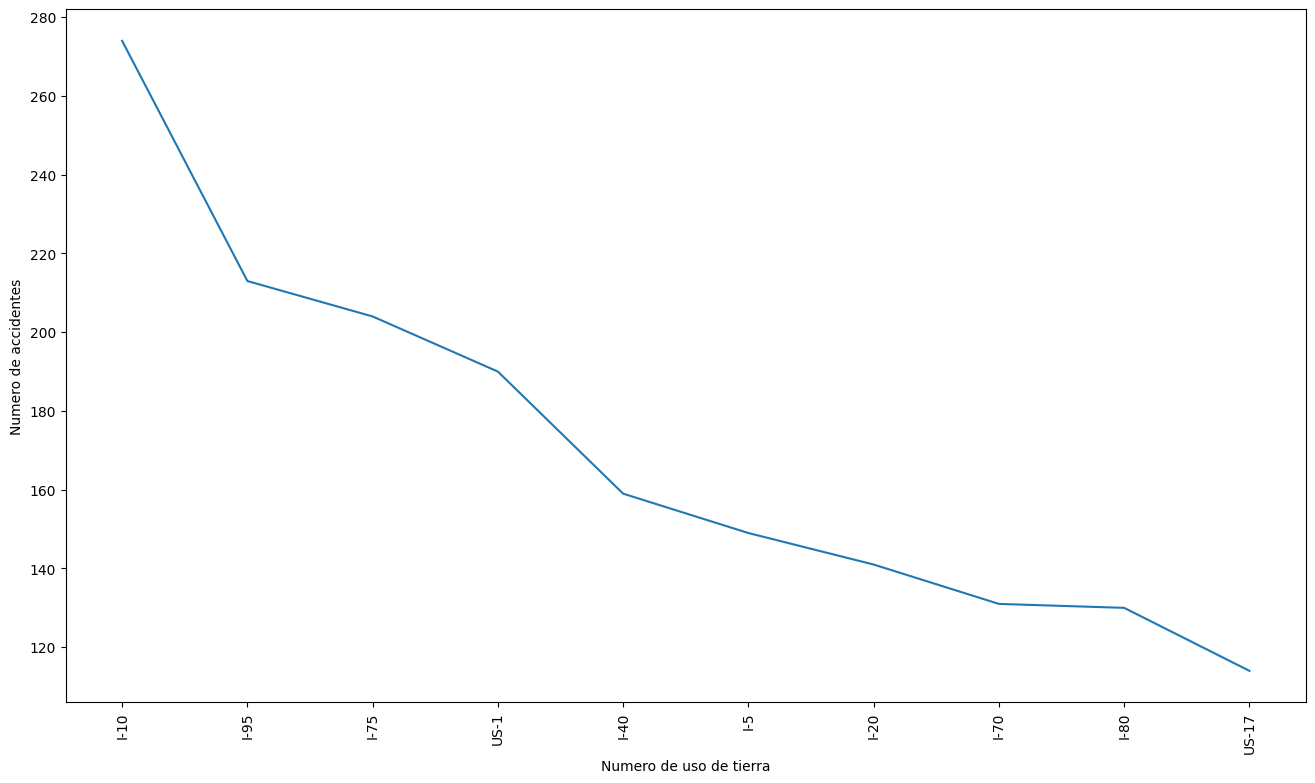

In [24]:
# Graficando los resultados anteriores.

# Definiendo variables:
# En este caso solamente tomamos las primeras 10 ya que son mas de 1500 carreteras.
x = list(df['trafficway_identifier'].value_counts().keys())
xx = x[:10]

y = list(df['trafficway_identifier'].value_counts())
yy = y[:10]

# Generando la grafica
plt.plot(xx,yy)
plt.xticks(rotation='vertical')
plt.xlabel('Numero de uso de tierra')
plt.ylabel('Numero de accidentes')

# Punto 3

# Punto 4

# Punto 5 